# Required Imports for This Notebook
- **Pandas**: Used for data handling, exploration, and manipulation.
- **Scikit-learn**: Provides tools for loading datasets and applying machine learning techniques.
- **Matplotlib**: Used for visualizing data with plots and charts.
- **Numpy**: Used for mathematical operations and calculations.

In [67]:
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

# Task 1: Source the Data Set

## Importing the Iris Dataset
We will import the Iris dataset from the `sklearn.datasets` module using the `load_iris()` function.

### Understanding `load_iris()`
- The `load_iris()` function returns a dictionary-like object called a **Bunch**.
- The **Bunch** contains attributes that allow access to both the data and metadata of the dataset.
- The dataset consists of **numerical features** (sepal length, sepal width, petal length, petal width) and  **target classes** representing the species (setosa, versicolor, virginica).

## Resources
- [Scikit-learn datasets documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html).


In [68]:
# Load the iris dataset
iris_dataset = datasets.load_iris()

# Task 2: Explore the Data Structure

In this task, we examined the structure of the Iris dataset by performing the following steps:

- **Printed the shape of the dataset** to determine the number of samples (rows) and features (columns).
- **Displayed the first 5 rows** to get an initial view of the data.
- **Displayed the last 5 rows** to check the end of the dataset.
- **Listed the feature names** to understand the measured attributes (sepal and petal dimensions).
- **Listed the target class names** to identify the species classifications.

## Resources
- [Pandas dataframe documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html)

In [69]:
# Convert the dataset into a Pandas DataFrame
iris_dataframe = pd.DataFrame(iris_dataset.data, columns=iris_dataset.feature_names)

# Add the target column to the DataFrame
iris_dataframe["target"] = iris_dataset.target

# 1. Print the shape of the dataset
print("Shape of the dataset:", iris_dataframe.shape)

# 2. Print the first 5 rows of the dataset
print("First 5 rows of the dataset:")
display(iris_dataframe.head())  # Use display() in Jupyter for better formatting

# 3. Print the last 5 rows of the dataset
print("Last 5 rows of the dataset:")
display(iris_dataframe.tail())

# 4. Print the feature names (column names)
print("Feature Names:", iris_dataset.feature_names)

# 5. Print the target class names (species)
print("Target Classes:", iris_dataset.target_names)

Shape of the dataset: (150, 5)
First 5 rows of the dataset:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Last 5 rows of the dataset:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


Feature Names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target Classes: ['setosa' 'versicolor' 'virginica']


# Task 3: Summarize the Data
For each feature calculating key statistical metrics (mean, min, max, standard deviation, and median) for the `iris_dataframe` and stores them in a new DataFrame.  
It then applies styling to align the table content and headers to the left before displaying the formatted table.

## Resources
[Pandas dataframes stats](https://pandas.pydata.org/docs/reference/frame.html#computations-descriptive-stats)

In [70]:
# Create a DataFrame to store statistics
iris_stats_dataframe = pd.DataFrame({
    "Mean": iris_dataframe.mean(),
    "Minimum": iris_dataframe.min(),
    "Maximum": iris_dataframe.max(),
    "Standard Deviation": iris_dataframe.std(),
    "Median": iris_dataframe.median()
})

## Apply table styling to align text to the left
feature_stats_styled = iris_stats_dataframe.style.set_table_styles([
    {'selector': 'th', 'props': [('text-align', 'left')]},  # Align column headers to the left
    {'selector': 'td', 'props': [('text-align', 'left')]}   # Align table content to the left
])
# Display the statistics in a well-formatted table
display(feature_stats_styled)

,Mean,Minimum,Maximum,Standard Deviation,Median
sepal length (cm),5.843333,4.300000,7.900000,0.828066,5.800000
sepal width (cm),3.057333,2.000000,4.400000,0.435866,3.000000
petal length (cm),3.758000,1.000000,6.900000,1.765298,4.350000
petal width (cm),1.199333,0.100000,2.500000,0.762238,1.300000
target,1.000000,0.000000,2.000000,0.819232,1.000000


# Task 4: Visualize Features

This code plots histograms for the four features of `iris_dataframe` in a 2×2 grid, setting the figure size to 12×8 inches.  
Each histogram has 20 bins, black edges, and 70% opacity, with the feature name as the title, the feature name as the x-axis label, and "Frequency" as the y-axis label.  
The layout is adjusted to prevent overlapping.

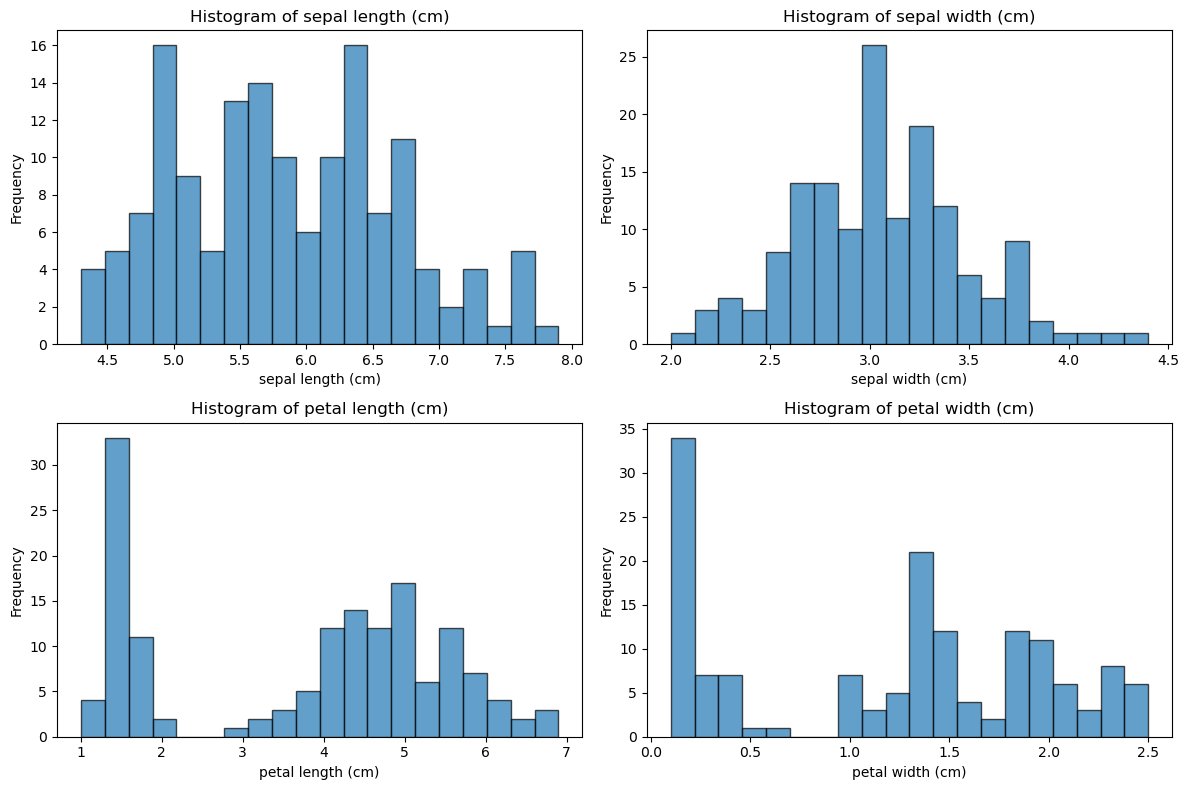

In [71]:
# Set figure size
plt.figure(figsize=(12, 8))

# Iterate through each column in the DataFrame
for i, column in enumerate(iris_dataframe.columns[:4], 1):
    # Create subplots
    plt.subplot(2, 2, i)
    # Histogram with 20 bins, black edges, and 70% opacity.
    plt.hist(iris_dataframe[column], bins=20, edgecolor="black", alpha=0.7)
    # Title
    plt.title(f"Histogram of {column}")
    # X-axis label
    plt.xlabel(column)
    # Y-axis label
    plt.ylabel("Frequency")

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

# Task 5: Investigate Relationships
This code creates a scatter plot of sepal length vs. sepal width, color-coding points by species.  
It iterates through the three species, filtering the dataset, and plots each species separately with a unique color.  
The plot shows the relationship between Sepal Length and Sepal Width for three Iris species (setosa, versicolor, virginica), highlighting distinct clustering patterns with some overlap between versicolor and virginica.

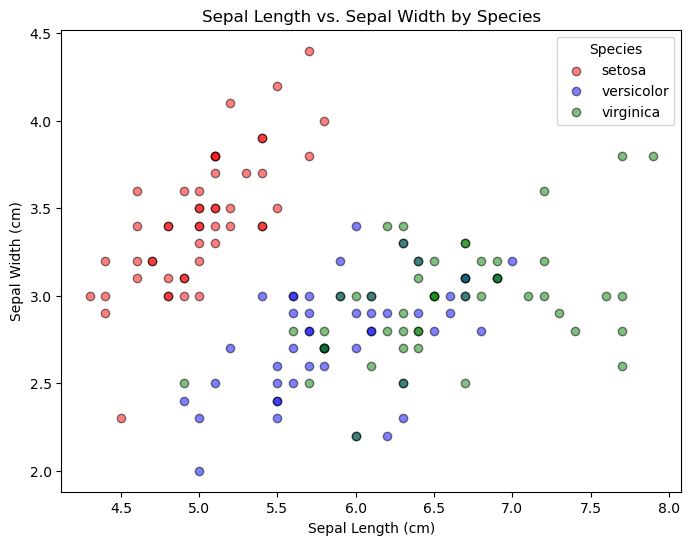

In [72]:
# Define colors for each species
iris_classes = {0: 'red', 1: 'blue', 2: 'green'}

# Scatter plot for Sepal Length vs. Sepal Width
plt.figure(figsize=(8, 6))

# Plot each species separately
for species, color in iris_classes.items():
    subset = iris_dataframe[iris_dataframe['target'] == species]
    plt.scatter(subset['sepal length (cm)'], subset['sepal width (cm)'],
            label=iris_dataset.target_names[species],
            color=color, alpha=0.5, edgecolors='black', marker='o')


# Labels and title
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.title("Sepal Length vs. Sepal Width by Species")
plt.legend(title="Species")

# Show plot
plt.show()

## Task 6: Analyze Relationship
Using `numpy.polyfit` to add a regression line to the scatter plot from Task 5.
## Resources
[numpy.polyfit documentation](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html)

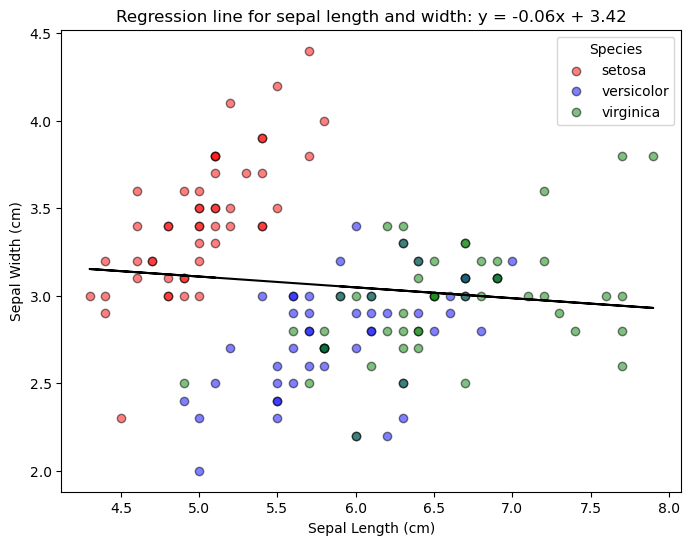

In [73]:
# From task 5: Scatter plot for Sepal Length vs. Sepal Width with regression line
iris_classes = {0: 'red', 1: 'blue', 2: 'green'}

# Scatter plot for Sepal Length vs. Sepal Width
plt.figure(figsize=(8, 6))

# Plot each species separately
for species, color in iris_classes.items():
    subset = iris_dataframe[iris_dataframe['target'] == species]
    plt.scatter(subset['sepal length (cm)'], subset['sepal width (cm)'],
            label=iris_dataset.target_names[species],
            color=color, alpha=0.5, edgecolors='black', marker='o')

# Labels and title
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.legend(title="Species")

# From task 6: Add regression line
sepal_length= iris_dataframe['sepal length (cm)']
sepal_width = iris_dataframe['sepal width (cm)']
m, c = np.polyfit(sepal_length, sepal_width, 1)
plt.plot(sepal_length, m * sepal_length + c, color='black')
plt.title(f'Regression line for sepal length and width: y = {m:.2f}x + {c:.2f}')
plt.show()


## Task 7: Analyze Class Distributions
Box-plots of the petal lengths for each of the three classes.  
Grouping the DataFrame by target and extract petal length values.  
The analysis suggests significant differences in petal length between species, with virginica having the longest petals, followed by versicolor, and setosa having the shortest.
## Resources
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html

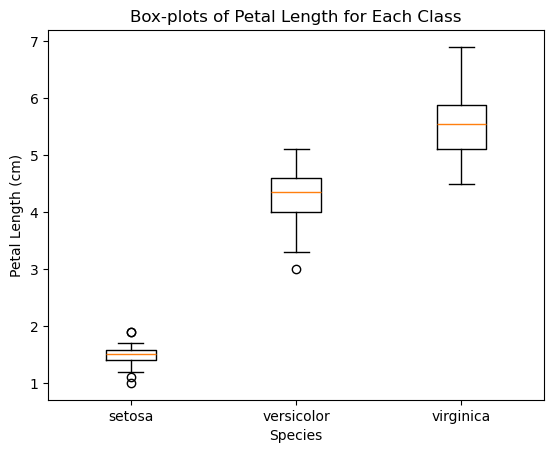

In [74]:
# Box-plots for petal length for each class
fig, axes = plt.subplots()

# Prepare data for box plots using groupby
data = [group['petal length (cm)'].values for name, group in iris_dataframe.groupby('target')]

# Create box plots
axes.boxplot(data, tick_labels= iris_dataset.target_names)

# Add title and labels
plt.title("Box-plots of Petal Length for Each Class")
plt.xlabel("Species")
plt.ylabel("Petal Length (cm)")

# Show plot
plt.show()